In [1]:
# Fixing path
import os

os.getcwd()   # Verify where it is right now...

'/home/jobquiroz/full_stack_deep_learning/lab03/notebooks'

In [2]:
# Solution, go to lab directory:
os.chdir('/home/jobquiroz/full_stack_deep_learning/lab03/')

In [3]:
from IPython import display

base_url = "https://fsdl-public-assets.s3.us-west-2.amazonaws.com"

display.Image(url=base_url + "/aiayn-figure-1.png")

In [4]:
from text_recognizer.models import ResnetTransformer


ResnetTransformer.forward??

In [5]:
display.Image(url=base_url + "/transformer-residual-view.png")

In [6]:
display.Latex(r"$\text{softmax}(Q \cdot K^T) \cdot V$")

<IPython.core.display.Latex object>

In [7]:
import torch.nn.functional as F

F._scaled_dot_product_attention??

In [8]:
display.Latex(r"$\text{softmax}(\underbrace{x^TW_Q^T}_Q \underbrace{W_Kx}_{K^T}) \underbrace{x W_V^T}_V W_O^T$")


<IPython.core.display.Latex object>

In [9]:
import matplotlib.pyplot as plt
import torch


low_rank = torch.randn(100, 1) @ torch.randn(1, 100)
full_rank = torch.randn(100, 100)
plt.figure(); plt.title("rank 1/100 matrix"); plt.imshow(low_rank, cmap="Greys"); plt.axis("off")
plt.figure(); plt.title("rank 100/100 matrix");  plt.imshow(full_rank, cmap="Greys"); plt.axis("off");

In [10]:
display.Image(url=base_url + "/transformer-layer-residual.png")

In [11]:
display.Image(url=base_url + "/residual-stream-read-write.png")

In [12]:
display.Image(url=base_url + "/residual-token-to-token.png")


In [13]:
from text_recognizer.models import transformer_util


attention_mask = transformer_util.generate_square_subsequent_mask(100)

ax = plt.matshow(torch.exp(attention_mask.T));  cb = plt.colorbar(ticks=[0, 1], fraction=0.05)
plt.ylabel("Can the embedding at this index"); plt.xlabel("attend to embeddings at this index?")
print(attention_mask[:10, :10].T); cb.set_ticklabels([False, True]);

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [-inf, 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [-inf, -inf, 0., 0., 0., 0., 0., 0., 0., 0.],
        [-inf, -inf, -inf, 0., 0., 0., 0., 0., 0., 0.],
        [-inf, -inf, -inf, -inf, 0., 0., 0., 0., 0., 0.],
        [-inf, -inf, -inf, -inf, -inf, 0., 0., 0., 0., 0.],
        [-inf, -inf, -inf, -inf, -inf, -inf, 0., 0., 0., 0.],
        [-inf, -inf, -inf, -inf, -inf, -inf, -inf, 0., 0., 0.],
        [-inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, 0., 0.],
        [-inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, 0.]])


In [14]:
PositionalEncoder = transformer_util.PositionalEncoding(d_model=50, dropout=0.0, max_len=200)

pe = PositionalEncoder.pe.squeeze().T[:, :]  # placing sequence dimension along the "x-axis"

ax = plt.matshow(pe); plt.colorbar(ticks=[-1, 0, 1], fraction=0.05)
plt.xlabel("sequence index"); plt.ylabel("embedding dimension"); plt.title("Positional Encoding", y=1.1)
print(pe[:4, :8])

tensor([[ 0.0000,  0.8415,  0.9093,  0.1411, -0.7568, -0.9589, -0.2794,  0.6570],
        [ 1.0000,  0.5403, -0.4161, -0.9900, -0.6536,  0.2837,  0.9602,  0.7539],
        [ 0.0000,  0.6379,  0.9825,  0.8753,  0.3656, -0.3123, -0.8465, -0.9915],
        [ 1.0000,  0.7701,  0.1860, -0.4835, -0.9308, -0.9500, -0.5324,  0.1301]])


In [15]:
fake_embeddings = torch.randn_like(pe) * 0.5

ax = plt.matshow(fake_embeddings); plt.colorbar(ticks=torch.arange(-2, 3), fraction=0.05)
plt.xlabel("sequence index"); plt.ylabel("embedding dimension"); plt.title("Embeddings Without Positional Encoding", y=1.1)

fake_embeddings_with_pe = fake_embeddings + pe

plt.matshow(fake_embeddings_with_pe); plt.colorbar(ticks=torch.arange(-2, 3), fraction=0.05)
plt.xlabel("sequence index"); plt.ylabel("embedding dimension"); plt.title("Embeddings With Positional Encoding", y=1.1);


### Paragraphs

In [16]:
import text_recognizer.data


emnist_lines = text_recognizer.data.EMNISTLines()
line_cnn = text_recognizer.models.LineCNNSimple(emnist_lines.config())

# for sliding, see the for loop over range(S)
line_cnn.forward??

In [17]:
iam_paragraphs = text_recognizer.data.IAMParagraphs()

iam_paragraphs.prepare_data()
iam_paragraphs.setup()
xs, ys = next(iter(iam_paragraphs.val_dataloader()))

iam_paragraphs

IAMParagraphs.prepare_data: Cropping IAM paragraph regions and saving them along with labels...


586MB [00:17, 35.8MB/s]                              


Computing SHA-256...
Extracting IAM data


IAMParagraphs.setup(None): Loading IAM paragraph regions and lines...


IAM Paragraphs Dataset
Num classes: 84
Input dims : (1, 576, 640)
Output dims: (682, 1)
Train/val/test sizes: 1087, 220, 232
Train Batch x stats: (torch.Size([128, 1, 576, 640]), torch.float32, tensor(0.), tensor(0.0252), tensor(0.0783), tensor(1.))
Train Batch y stats: (torch.Size([128, 682]), torch.int64, tensor(1), tensor(83))
Test Batch x stats: (torch.Size([128, 1, 576, 640]), torch.float32, tensor(0.), tensor(0.0278), tensor(0.0843), tensor(0.9373))
Test Batch y stats: (torch.Size([128, 682]), torch.int64, tensor(1), tensor(83))

<S>They only worked, of course, a five-
day week so that in the first week
Monday to Friday were days one
to five of the timetable, the following
Monday was day six and Tuesday
started day one again and so on.
By this means they avoided each
week being the same with a pupil
knowing exactly what the subject
would be on Friday afternoon at
3 p.m..<E>


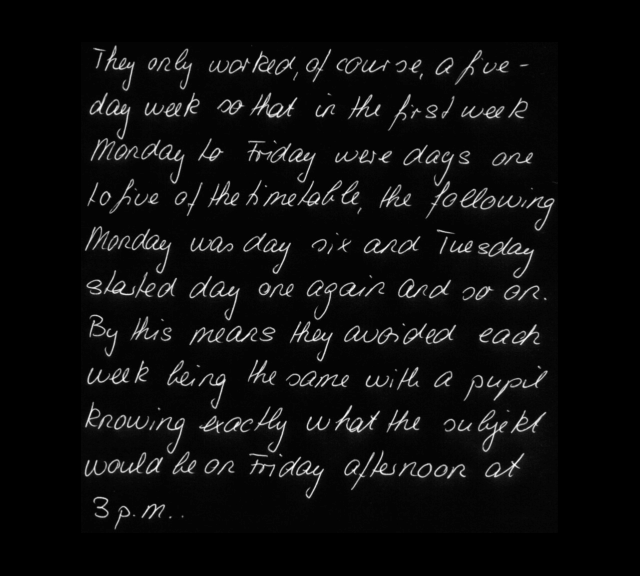

In [18]:
import random

import numpy as np
import wandb


def show(y):
    y = y.detach().cpu()  # bring back from accelerator if it's being used
    return "".join(np.array(iam_paragraphs.mapping)[y]).replace("<P>", "")

idx = random.randint(0, len(xs))

print(show(ys[idx]))
wandb.Image(xs[idx]).image


In [19]:
import text_recognizer.models

rnt = text_recognizer.models.ResnetTransformer(data_config=iam_paragraphs.config())

In [20]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

rnt.to(device); xs = xs.to(device); ys = ys.to(device);

In [21]:
resnet_embedding, = rnt.resnet(xs[idx:idx+1].repeat(1, 3, 1, 1))
 # resnet is designed for RGB images, so we replicate the input across channels 3 times

In [23]:
%matplotlib inline

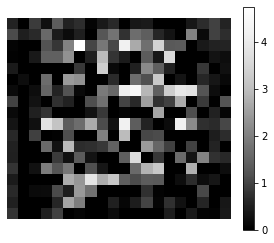

In [24]:
resnet_idx = random.randint(0, len(resnet_embedding))  # re-execute to view a different channel
plt.matshow(resnet_embedding[resnet_idx].detach().cpu(), cmap="Greys_r");
plt.axis("off"); plt.colorbar(fraction=0.05);

In [25]:
preds, = rnt(xs[idx:idx+1])  # can take up to two minutes on a CPU. Transformers ❤️ GPUs

<S>g?gRKKgKKIgHIWKHg?KH6P?HKgKHggg?g?K6KHlg?*gKKgHHg?H66IHgHIg?wKKHgHKK?H?KIHQgKg'<B>?gggH?I?KHK?H??wggPKX?PgHK<E>


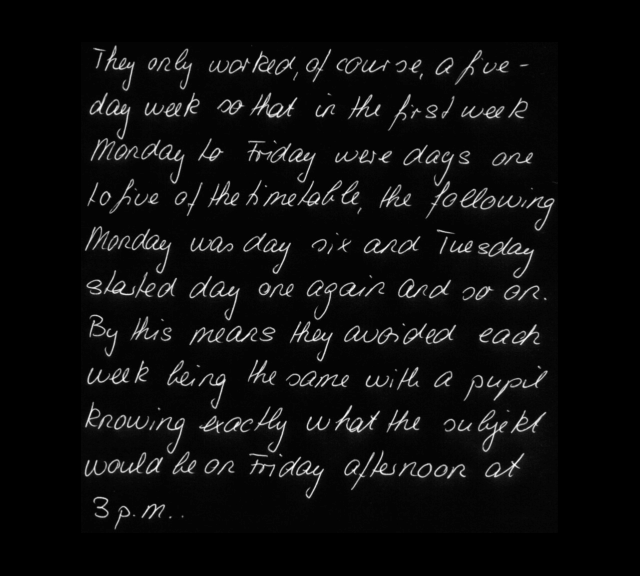

In [26]:
print(show(preds.cpu()))
wandb.Image(xs[idx]).image

In [27]:
import text_recognizer.lit_models

lit_rnt = text_recognizer.lit_models.TransformerLitModel(rnt)

In [28]:
forcing_outs, = lit_rnt.teacher_forward(xs[idx:idx+1], ys[idx:idx+1])

H??K6Ig?KKHf?ggKgl3IKgKgggg??g?KK?KgHKSlKHgKg<E>HKHK??g??gKe?HIw?HggKgwH?H?KwH6gHKgHHgwgKgHKHegpHH??IgK3HKH?gIHP)KHH?HH)KHKwIHH?gH??1H?wKK3??lKI6?3<B>??IH???ggKe?l6?KH???HHgH??W6KKgHgwKH?KHHHg?PggPgKHHWHgKHKKK6?gg<B>gHHK?g?gggg?g?K<E>KKgHgKH?H?H?gKKKKH???KKeKK??3HKgKHK?K3HHHggg33gWKXg?HggHK?g??g6X?HwHgH*K6<B>?KuKHlg3?g??KgX3Hl3g)???KIKKW<E>H)3HK?Kg??g6?KuHw??l?<B>uKW?Hg<E>HHK33g33??gHK?HgIl-g6?W6KKg?Hglg?KH)HIgI)?KI??g3gHgK?IlWR'gH?I6??S6)g?Hu?W)u6IgIH3??K3XHHeIgHlg)*gHHgVgglH3?gHKgggK?IK?3HWWgKgKg)3gH?IH3gKK6)HKIgHgH<E>g<B>?K633Sl?3Kg6lHHgKl???wH?KHH<E>g??Kw36K?KwK)K<B>g?'KwgPK*HHH6KwlKHg?H?6??6)3?w?wg?Kg?K6HHw?<B>gIIIHKHKKK?K?K'g?gK'RKgHH6K<B>K33?gKH<S><E>gHg*KHHw3HHgH?Hel?Hg?gHIK?lw<E>HHXKH??gHHHH??3HHKH


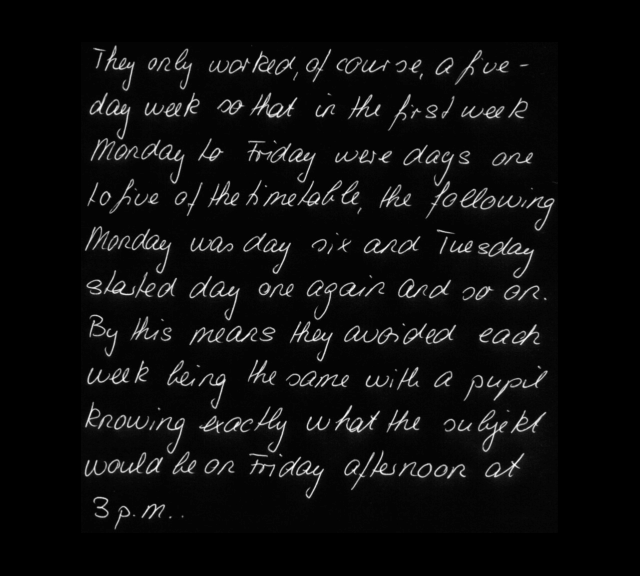

In [29]:
forcing_preds = torch.argmax(forcing_outs, dim=0)

print(show(forcing_preds.cpu()))
wandb.Image(xs[idx]).image

In [30]:
import torch

gpus = int(torch.cuda.is_available())

if gpus:
    !nvidia-smi
else:
    print("watch out! working with this model on a typical CPU is not feasible")
    

Fri Aug 26 02:27:00 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P0    28W /  70W |   2045MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [31]:
%%time
# above %%magic times the cell, useful as a poor man's profiler

%run training/run_experiment.py --data_class IAMParagraphs --model_class ResnetTransformer --loss transformer \
  --gpus={gpus} --batch_size 16 --precision 16 \
  --limit_train_batches 10 --limit_test_batches 1 --limit_val_batches 2

Missing logger folder: training/logs/lightning_logs
Using 16bit native Automatic Mixed Precision (AMP)
Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
`Trainer(limit_test_batches=1)` was configured so 1 batch will be used.
IAMParagraphs.setup(fit): Loading IAM paragraph regions and lines...
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name                      | Type                    | Params
-----------------------------------------------------------------------
0  | model                     | ResnetTransformer       | 14.0 M
1  | model.resnet              | Sequential              | 11.2 M
2  | model.encoder_projection  | Conv2d                  | 131 K 
3  | model.enc_pos_encoder     | PositionalEncodingImag

Sanity Checking: 0it [00:00, ?it/s]

/home/jobquiroz/miniconda3/envs/fsdl-text-recognizer-2022/lib/python3.7/site-packages/pytorch_lightning/trainer/trainer.py:1931: PossibleUserWarning: The number of training batches (10) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
  category=PossibleUserWarning,


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

IAMParagraphs.setup(test): Loading IAM paragraph regions and lines...
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

─────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
─────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test/cer            1.7371718883514404
        test/loss            3.356740713119507
─────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Best model saved at: /home/jobquiroz/full_stack_deep_learning/lab03/training/logs/lightning_logs/version_0/epoch=0000-validation.loss=3.445-validation.cer=1.785.ckpt


CPU times: user 1min 58s, sys: 18.8 s, total: 2min 17s
Wall time: 1min 43s


<Figure size 432x288 with 0 Axes>